In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

In [80]:
# Seasonal color scheme
dry_season_color = '#CC6600'
wet_season_color = '#669966'

Monthly gas prices graph: (from 2020 to 2024)

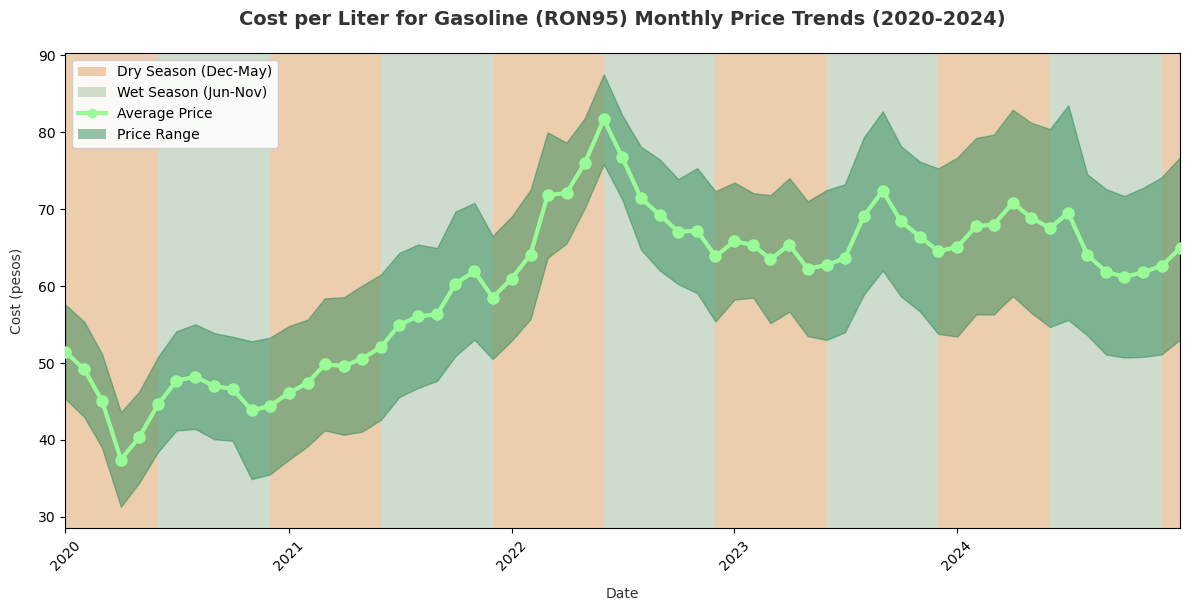

In [86]:
# Load and prepare the data
meralco_df = pd.read_csv('MonthlyPumpPrices.csv', parse_dates=['Date'])
ron95_data = meralco_df[meralco_df['Product'] == "Gasoline (RON95)"].sort_values('Date')

# Strictly filter data for 2020-2024
ron95_data = ron95_data[(ron95_data['Date'] >= '2020-01-01') & 
                        (ron95_data['Date'] <= '2025-01-01')]

# Calculate average price
ron95_data['Average Price'] = (ron95_data['Overall Range Min'] + ron95_data['Overall Range Max']) / 2

# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Apply seasonal backgrounds
for year in range(2019, 2025):
    # Dry season (Dec-May)
    dry_start = pd.Timestamp(f'{year}-12-01')
    dry_end = pd.Timestamp(f'{year+1}-06-01')
    ax.axvspan(max(dry_start, pd.Timestamp('2020-01-01')),
                min(dry_end, pd.Timestamp('2024-12-31')),
                facecolor=dry_season_color, alpha=0.3, zorder=-1)
    
    # Wet season (Jun-Nov)
    wet_start = pd.Timestamp(f'{year}-06-01')
    wet_end = pd.Timestamp(f'{year}-12-01')
    ax.axvspan(max(wet_start, pd.Timestamp('2020-01-01')),
                min(wet_end, pd.Timestamp('2024-12-31')),
                facecolor=wet_season_color, alpha=0.3, zorder=-1)

# Price visualization colors
price_line_color = '#98FB98'
price_range_color = '#2E8B57'

# Plot data
plt.plot(ron95_data['Date'], ron95_data['Average Price'],
         color=price_line_color, linewidth=3, marker='o', markersize=8,
         label='Average Price', zorder=3)

plt.fill_between(ron95_data['Date'],
                 ron95_data['Overall Range Min'],
                 ron95_data['Overall Range Max'],
                 color=price_range_color, alpha=0.5, label='Price Range', zorder=2)

# Formatting
plt.title("Cost per Liter for Gasoline (RON95) Monthly Price Trends (2020-2024)", 
          pad=20, fontsize=14, fontweight='bold', color='#333333')
plt.xlabel("Date", labelpad=10, color='#333333')
plt.ylabel("Cost (pesos)", labelpad=10, color='#333333')

# Enhanced legend
legend_elements = [
    Patch(facecolor=dry_season_color, alpha=0.3, label='Dry Season (Dec-May)'),
    Patch(facecolor=wet_season_color, alpha=0.3, label='Wet Season (Jun-Nov)'),
    plt.Line2D([0], [0], color=price_line_color, lw=3, marker='o', label='Average Price'),
    Patch(facecolor=price_range_color, alpha=0.5, label='Price Range')
]

plt.legend(handles=legend_elements, frameon=True, loc='upper left',
           framealpha=0.9, facecolor='white')

# Axis formatting
ax.set_xlim([pd.Timestamp('2020-01-01'), pd.Timestamp('2024-12-31')])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

# Remove gridlines and set background
plt.grid(False)
ax.set_facecolor('#FAFAFA')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Monthly electricity prices graph (2020 to 2024)

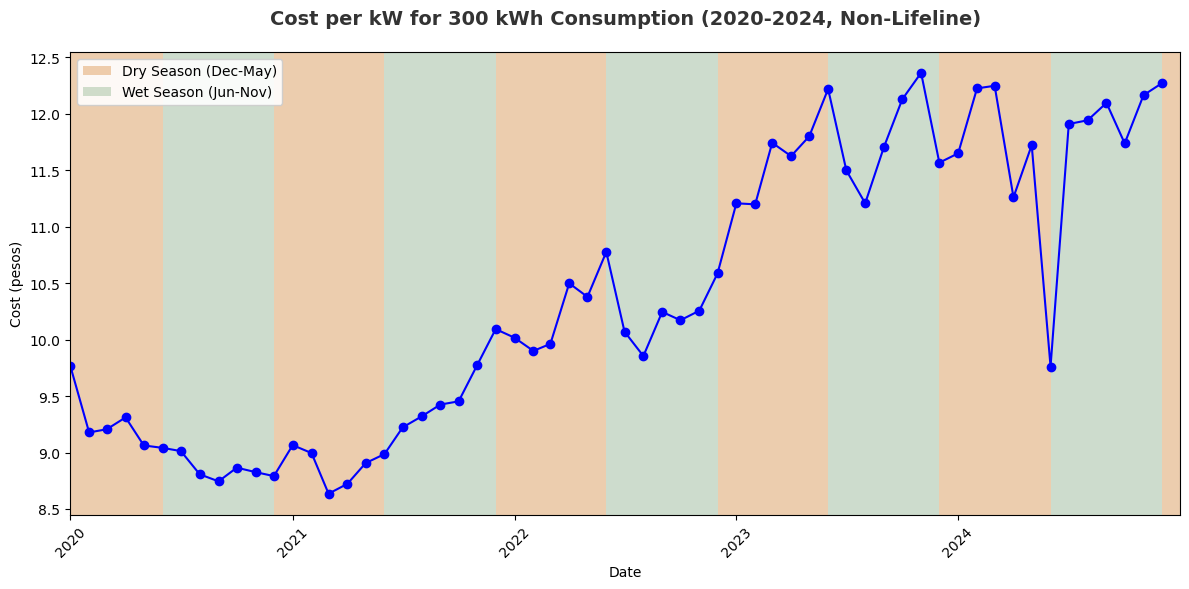

In [87]:
# Load the CSV data from the file.
meralco_df = pd.read_csv('MeralcoSummaryOfRates.csv')

# Convert 'Year' and 'Month' to a datetime object
meralco_df['Date'] = pd.to_datetime(meralco_df['Year'].astype(str) + '-' + meralco_df['Month'].astype(str), format='%Y-%m')

# Remove the original 'Year' and 'Month' columns
meralco_df = meralco_df.drop(columns=['Year', 'Month'])

# Reorder the columns to make 'Date' the first column
cols = ['Date'] + [col for col in meralco_df.columns if col != 'Date']
meralco_df = meralco_df[cols]

kwh_100_data = meralco_df[(meralco_df['kWh Consumption'] == 300) & (meralco_df['For Lifeline Customers'] == False)]
kwh_100_data = kwh_100_data[(kwh_100_data['Date'].dt.year >= 2020) & (kwh_100_data['Date'].dt.year <= 2024)]

# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Apply seasonal backgrounds
for year in range(2019, 2025):
    # Dry season (Dec-May)
    dry_start = pd.Timestamp(f'{year}-12-01')
    dry_end = pd.Timestamp(f'{year+1}-06-01')
    ax.axvspan(max(dry_start, pd.Timestamp('2020-01-01')),
                min(dry_end, pd.Timestamp('2024-12-31')),
                facecolor=dry_season_color, alpha=0.3, zorder=-1)
    
    # Wet season (Jun-Nov)
    wet_start = pd.Timestamp(f'{year}-06-01')
    wet_end = pd.Timestamp(f'{year}-12-01')
    ax.axvspan(max(wet_start, pd.Timestamp('2020-01-01')),
                min(wet_end, pd.Timestamp('2024-12-31')),
                facecolor=wet_season_color, alpha=0.3, zorder=-1)

plt.plot(kwh_100_data['Date'], kwh_100_data['Total Bill'], marker='o', linestyle='-', color='b')

# Axis formatting
ax.set_xlim([pd.Timestamp('2020-01-01'), pd.Timestamp('2024-12-31')])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

# Enhanced legend
legend_elements = [
    Patch(facecolor=dry_season_color, alpha=0.3, label='Dry Season (Dec-May)'),
    Patch(facecolor=wet_season_color, alpha=0.3, label='Wet Season (Jun-Nov)'),
]

plt.legend(handles=legend_elements, frameon=True, loc='upper left',
           framealpha=0.9, facecolor='white')

plt.title('Cost per kW for 300 kWh Consumption (2020-2024, Non-Lifeline)', 
          pad=20, fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Date')
plt.ylabel('Cost (pesos)')

plt.grid(False)  # Add gridlines for easier reading
ax.set_facecolor('#FAFAFA')
plt.xticks(rotation=45) # Rotate the x-ticks for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Seasonality for electricity